b=1


100%|██████████| 100/100 [00:01<00:00, 74.34it/s]


integ: 0.9999999999999966
b=-10


100%|██████████| 100/100 [00:01<00:00, 75.50it/s]


integ: 1.0000000000000002
b=-100


100%|██████████| 100/100 [00:01<00:00, 77.07it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


integ: 0.9999999999999999


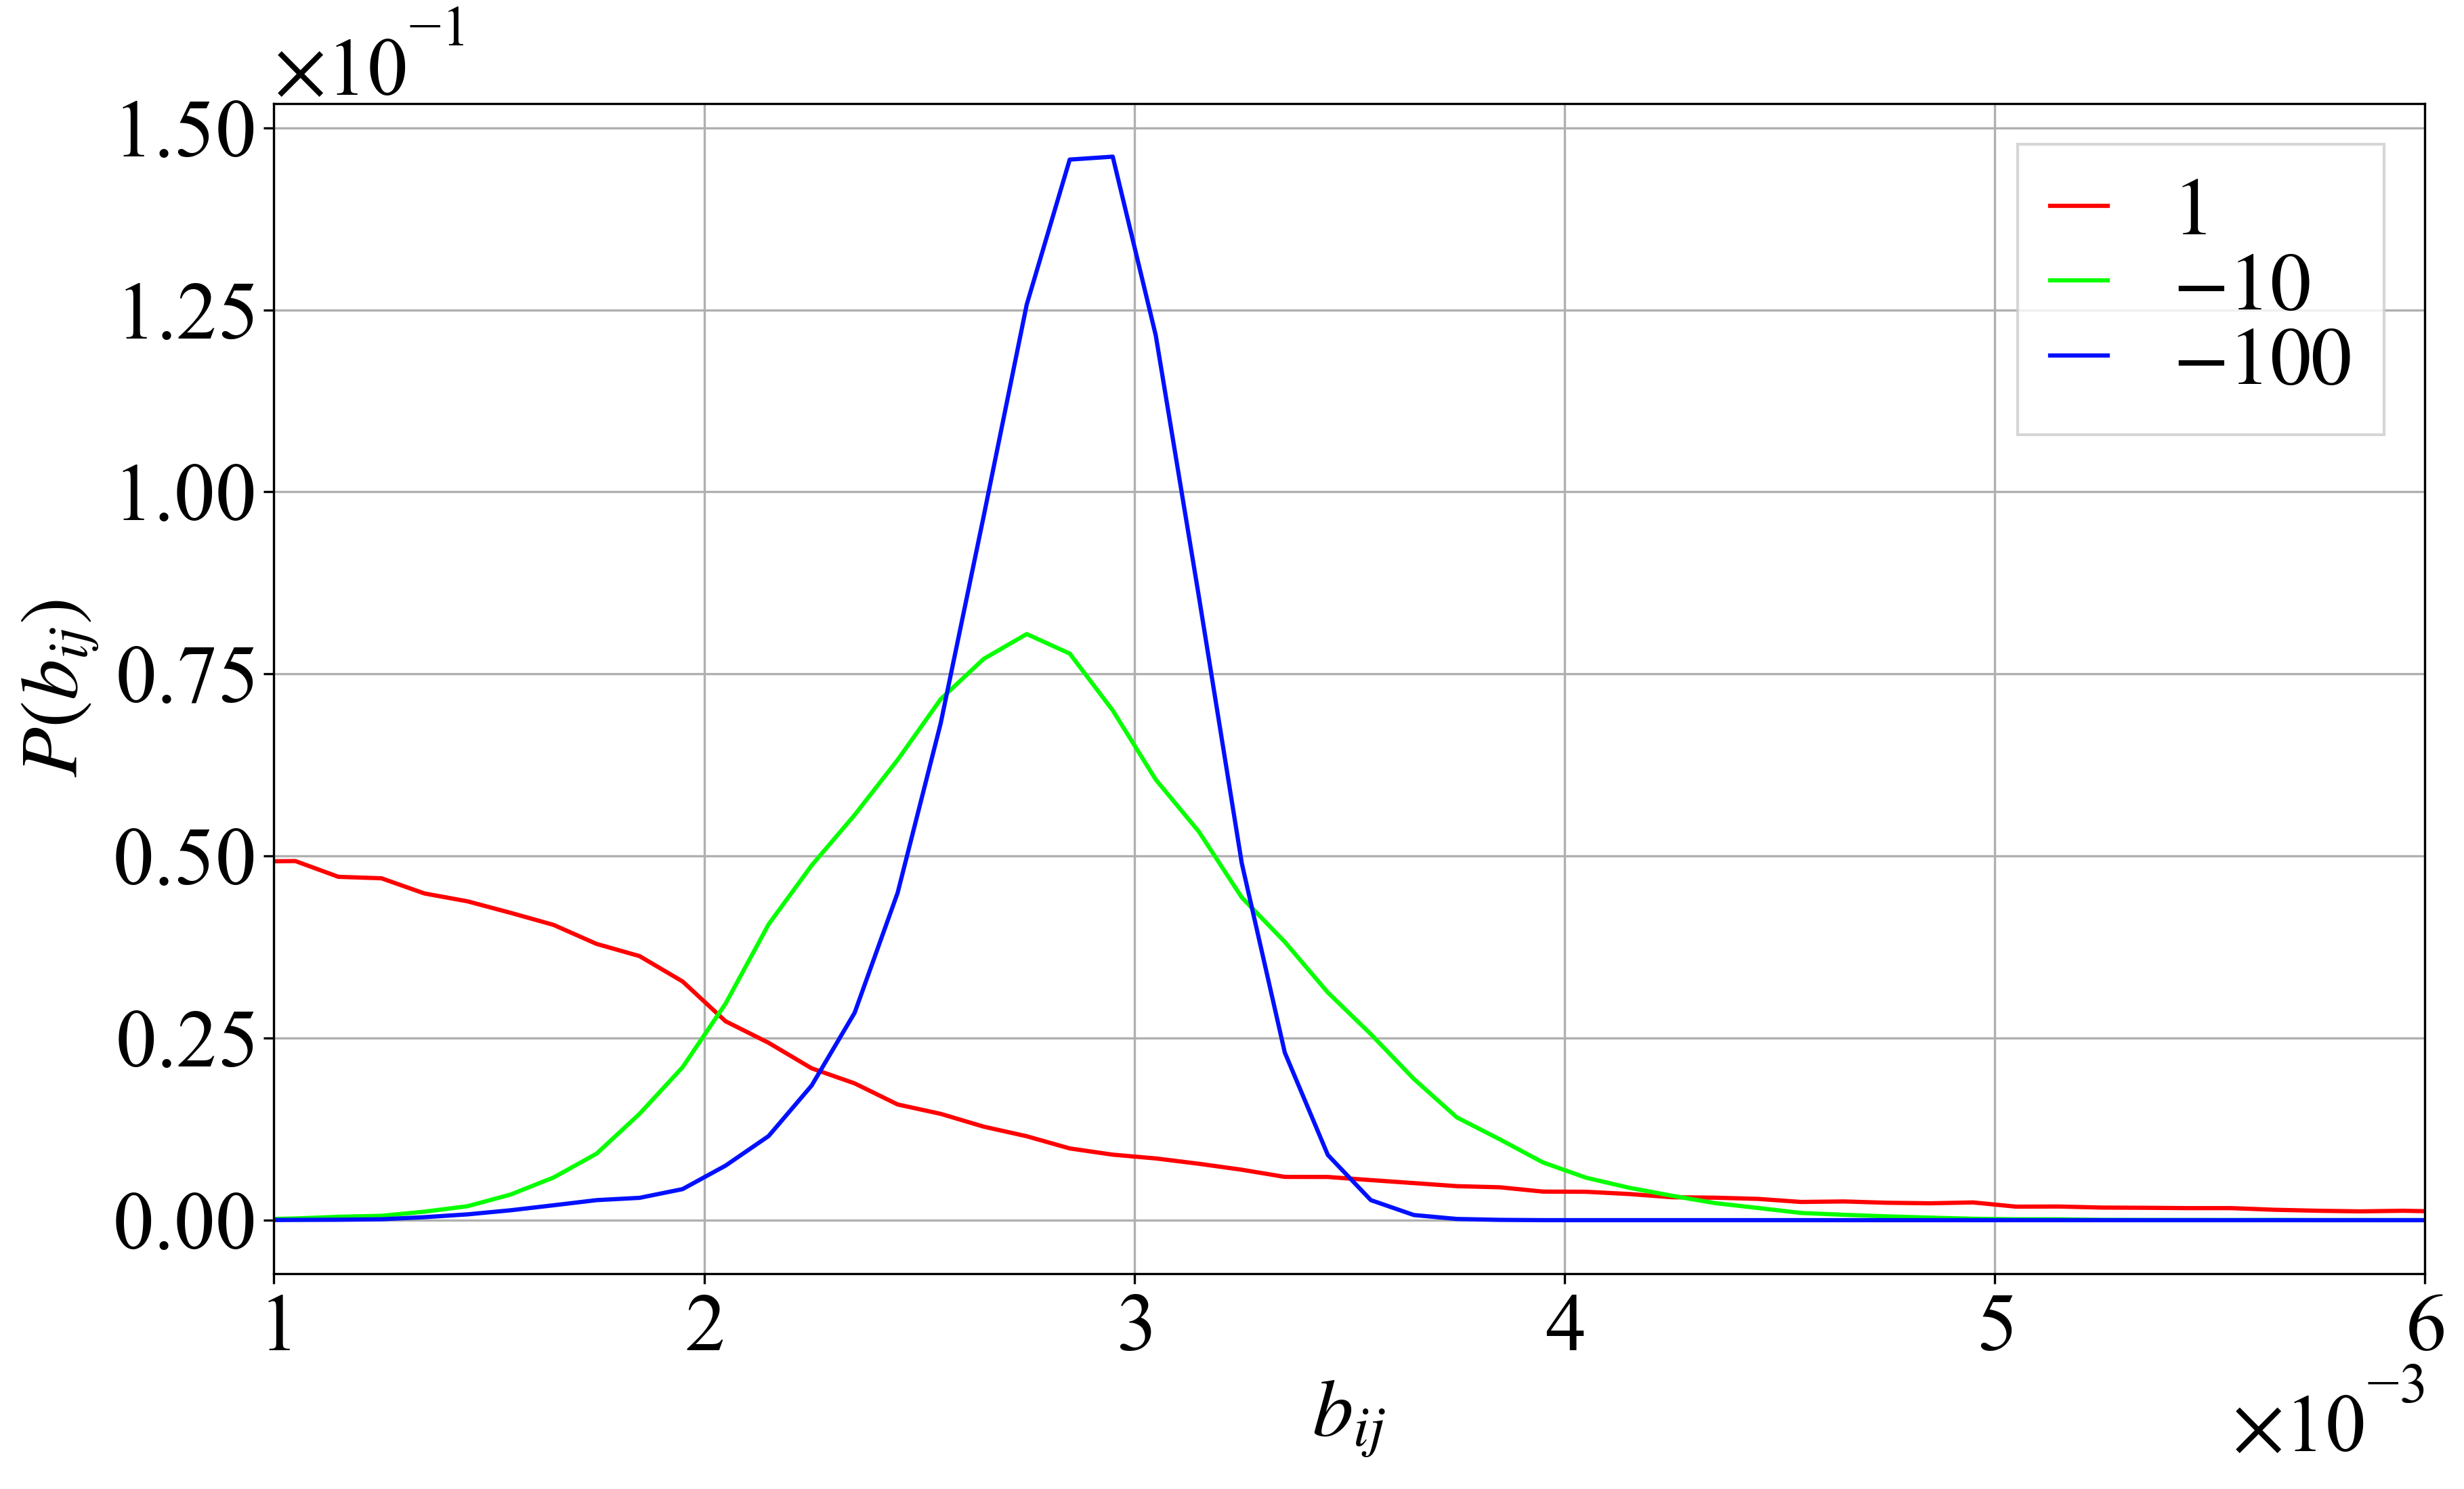

: 

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
import matplotlib.cm as cm
from colorsys import hsv_to_rgb
from tqdm import tqdm

from lib.utilities import frequency_distribution

def rescale_e(bc, n):
    scale = 2 / ((n) * (n - 1))
    return [bc_ * scale for bc_ in bc]

# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

plt.rcParams["font.size"] = 29
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.handlelength"] = 0.7
plt.rcParams["legend.labelspacing"] = 0
plt.rcParams["legend.handletextpad"] = 0.8  # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1  # 点がある場合のmarker scale
plt.rcParams["legend.fontsize"] = 29
# plt.rcParams["ps.useafm"] = True
# plt.rcParams["pdf.use14corefonts"] = True
# plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(tight_layout=True, figsize=(8*1.6, 5*1.6))

fig.subplots_adjust(bottom=0.2, left=0.18, top=0.99, right=0.96)

ax.set_xlabel("$b_{ij}$")
ax.set_ylabel("$P(b_{ij})$")

n = 1000
m = 2
bs = [1, -10, -100]
config = True

config_str = "" if config else "_no_config"

c1_h = 358 / 360
c2_h = 224 / 360
g = (c1_h - c2_h) / len(bs)

colors = [hsv_to_rgb(c1_h - i * g, 0.9, 1.0) for i in range(len(bs))]
lss = ["-", "--", "-."]

for clr_i, b in enumerate(bs):
    print(f"b={b}")
    ym = dict()
    nn = 100
    for i in tqdm(range(nn)):
        path = f"./data/result/bc_n{n}_m{m}_b{b}{config_str}_{i}.csv"

        with open(path, "r") as f:
            bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
        # bc = rescale_e(bc, n)
        df = frequency_distribution(bc, 0.0001)

        # for row in df.index:
        #     if (df.loc[row] == 0).any():
        #         df.drop(row, axis=0, inplace=True)

        for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
            if x in ym:
                ym[x] += y / nn
            else:
                ym[x] = y / nn

    l = fr"${b}$"
    if b == "a":
        l = r"$\rm{SF}$"

    # ax.plot(list(ym.keys()), list(ym.values()), marker="v", label=l, color=colors[clr_i])
    ax.plot(list(ym.keys()), list(ym.values()), label=l, color=cm.hsv(clr_i / len(bs)))

    print(f"integ: {sum(list(ym.values()))}")

    del ym

# ax.set_xscale("log")
# ax.set_yscale("log")

# # 片対数の場合
# # 値が小さすぎるときに指数表記にする
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(29)
ax.ticklabel_format(style="sci", axis='x', scilimits=(0,0))

ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.yaxis.offsetText.set_fontsize(29)
ax.ticklabel_format(style="sci", axis='y', scilimits=(0,0))

# lines, labels = fig.axes[-1].get_legend_handles_labels()
# # ax[0][0].legend()
# fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor=(0.5, 0.05), ncol=4)

plt.xlim([0.001, 0.0060])
plt.legend(loc="upper right")
fig.savefig(f'./img/bc_n{n}_m{m}{config_str}-hayashi-color.eps', bbox_inches="tight", pad_inches=0.05)
# plt.savefig("./媒介中心性(エッジ)の分布の変化_loglog.png")
plt.show()



# Configuration modelの有無での比較

ER 1.0000000000000004
1
0
-1
-5
-10
-20
-50


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-100


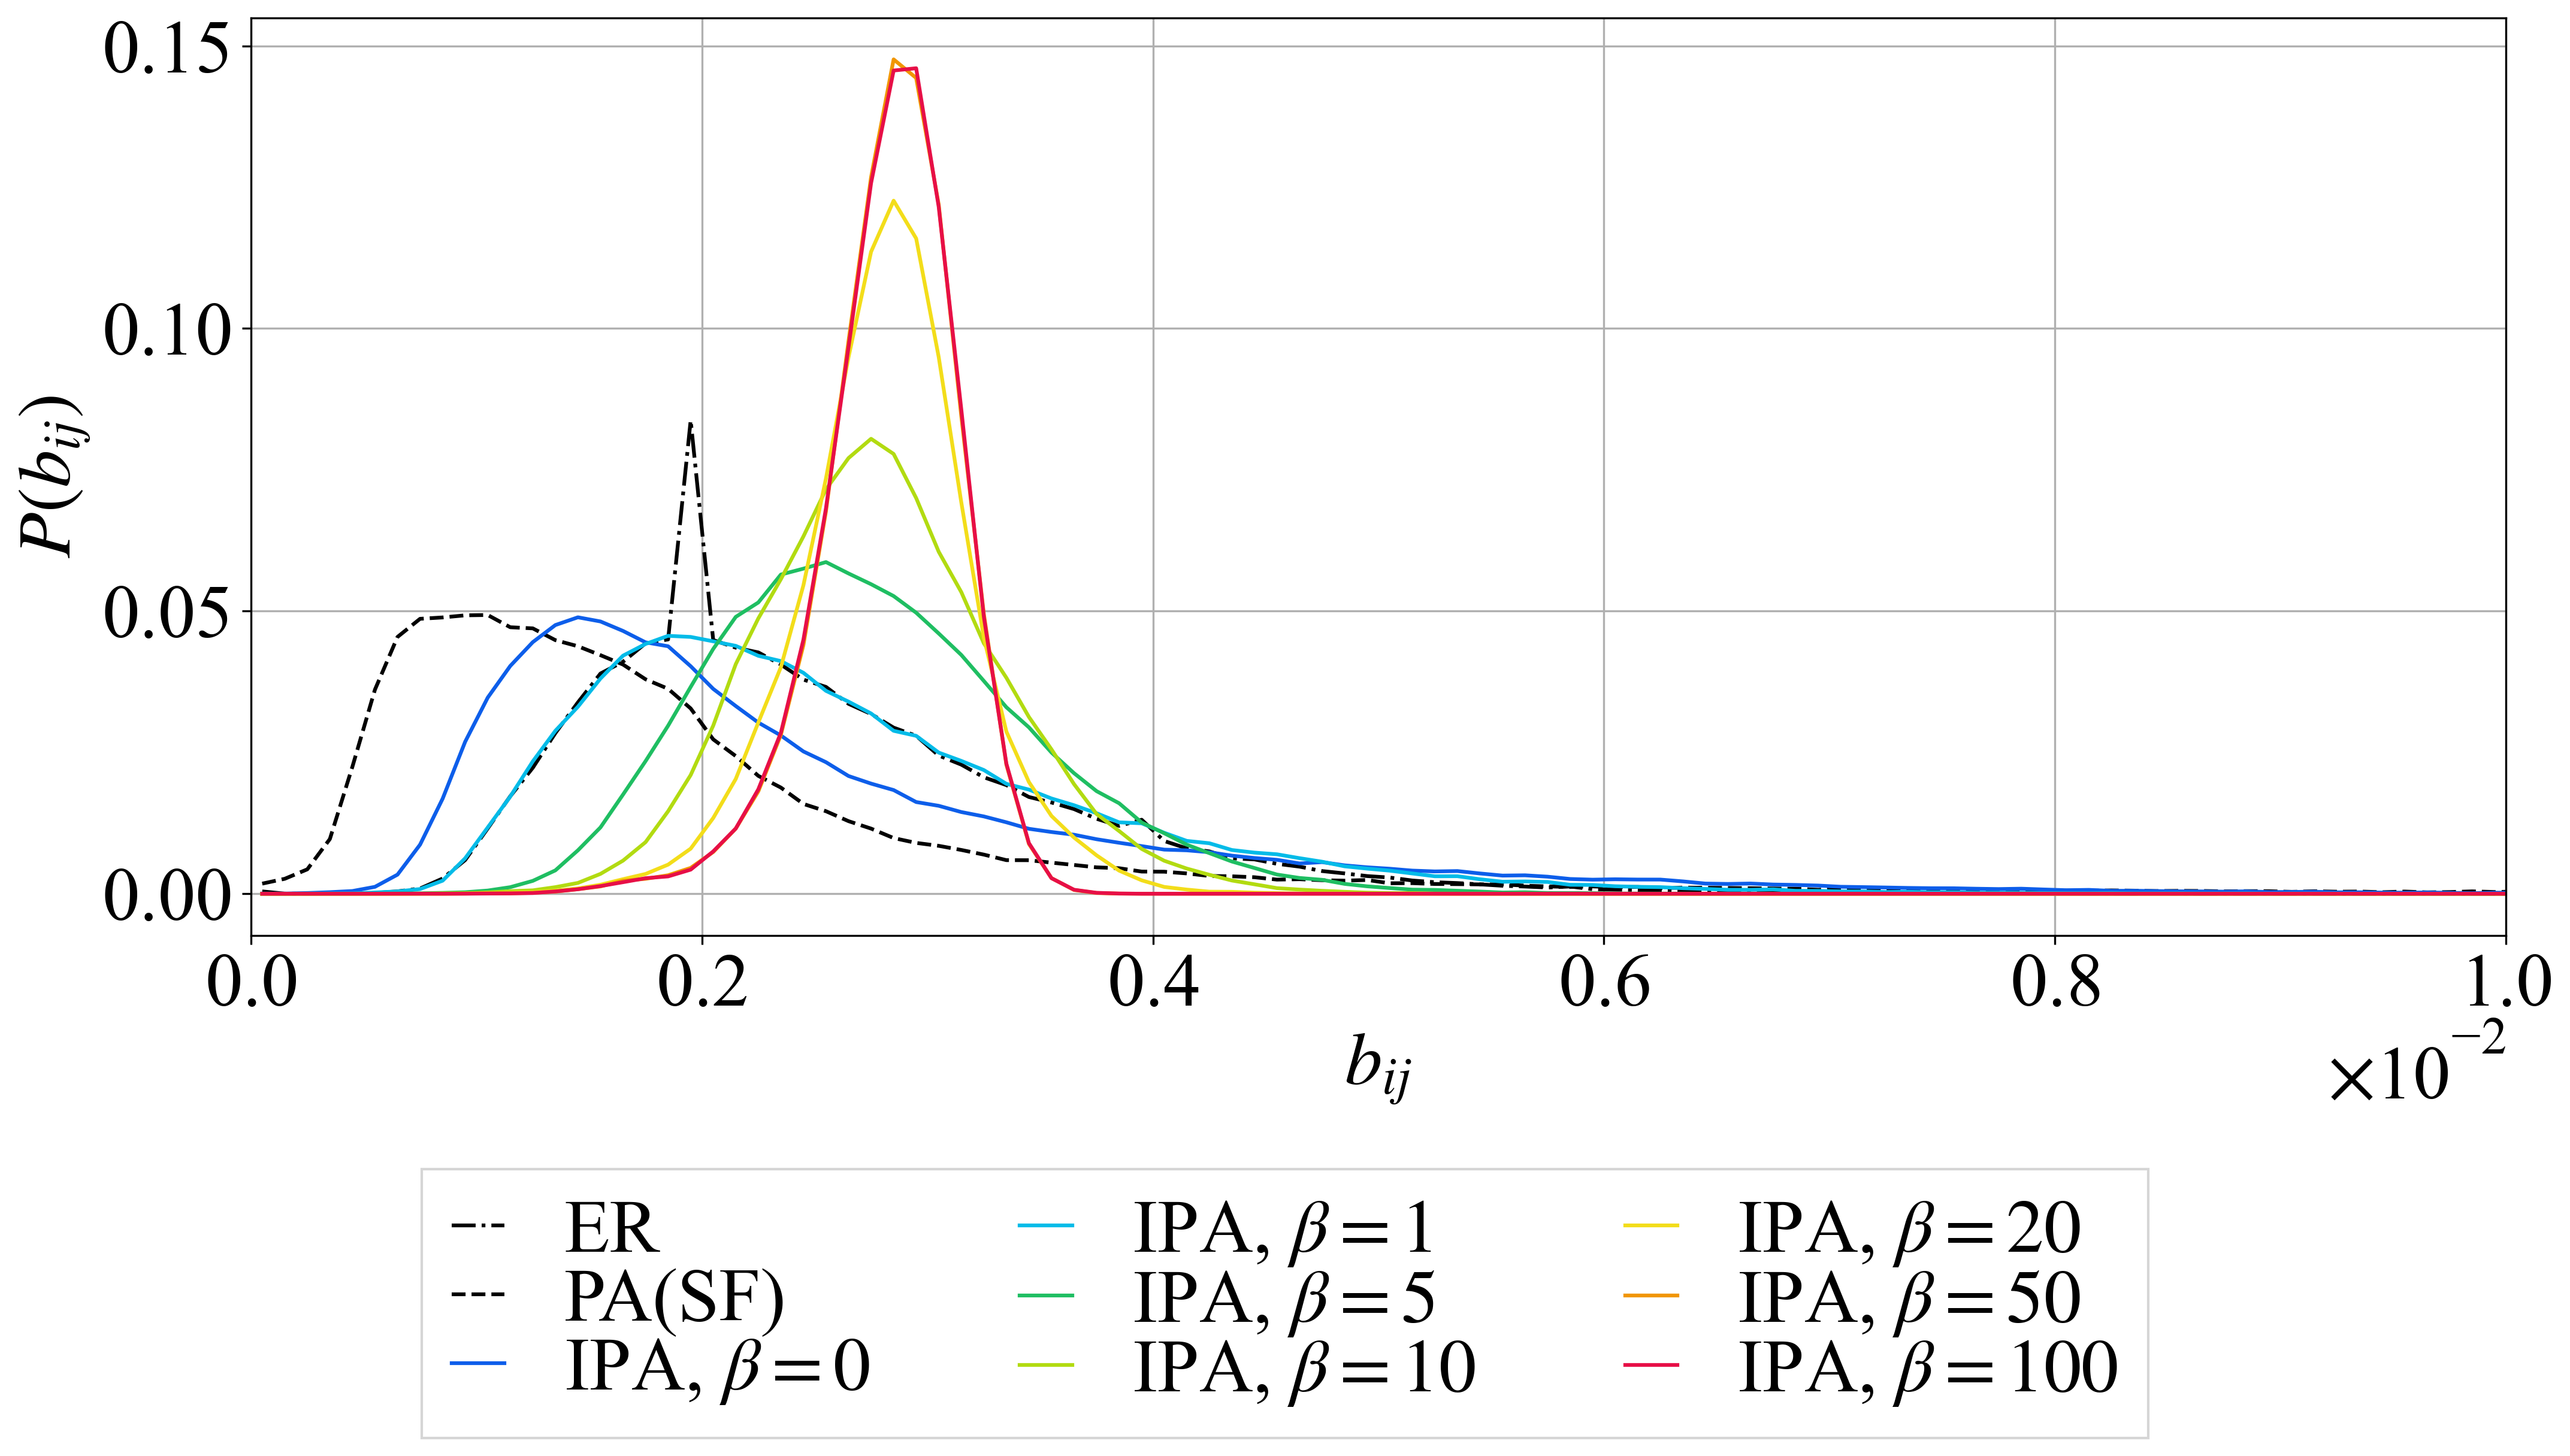

In [3]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from colorsys import hsv_to_rgb

from lib.utilities import frequency_distribution

from matplotlib.ticker import ScalarFormatter

n = 1000
nn = 100
m = 2
bs = [1, 0, -1, -5, -10, -20, -50, -100]
config = True

config_str = "" if config else "_no_config"

c1_h = 358 / 360
c2_h = 224 / 360
g = (c1_h - c2_h) / len(bs)

colors = [
    "",
    "#0d5eea",
    "#03BBE8",
    "#1FBE62",
    "#b2db11",
    "#f3dd1a",
    "#f19601",
    "#e70f47",
]
lss = ["-", "--", "-."]

# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

plt.rcParams["font.size"] = 30
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.handlelength"] = 0.7
plt.rcParams["legend.labelspacing"] = 0
plt.rcParams["legend.handletextpad"] = 0.8  # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1  # 点がある場合のmarker scale
plt.rcParams["legend.fontsize"] = 30
# plt.rcParams["ps.useafm"] = True
# plt.rcParams["pdf.use14corefonts"] = True
# plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 300

ys = 1
xs = 1
fig, ax = plt.subplots(ys, xs, tight_layout=True, figsize=(15*xs, 7*ys))

fig.subplots_adjust(bottom=0.2, left=0.18, top=0.99, right=0.96)

ax.set_ylabel("$P(b_{ij})$")
ax.set_xlabel("$b_{ij}$")

# ER network
ym = dict()
for i in range(nn):
    path = f"./data/result/ER/bc_{i}.csv"
    with open(path, "r") as f:
        bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
    df = frequency_distribution(bc, 0.0001)
    for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
        if x in ym:
            ym[x] += y / nn
        else:
            ym[x] = y / nn
print("ER", sum(ym.values()))
ax.plot(list(ym.keys()), list(ym.values()), label="ER", linestyle="dashdot", color="black")
ax.set_xlim([0, 0.010])

# kb attachments
for clr_i, b in enumerate(bs):
    ym = dict()
    for i in range(nn):
        path = f"./data/result/bc_n{n}_m2_b{b}_{i}.csv"
        with open(path, "r") as f:
            bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
        df = frequency_distribution(bc, 0.0001)
        for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
            if x in ym:
                ym[x] += y / nn
            else:
                ym[x] = y / nn
    print(b)
    ax.set_xlim([0, 0.010])

    if b == 1:
        l = r"PA(SF)"
        ax.plot(list(ym.keys()), list(ym.values()), label=l, linestyle="dashed", color="black")
    elif b == 0:
        l = r"IPA, $\beta=0$"
        ax.plot(list(ym.keys()), list(ym.values()), label=l, color=colors[clr_i])
    else:
        l = fr"IPA, $\beta={b*-1}$"
        ax.plot(list(ym.keys()), list(ym.values()), label=l, color=colors[clr_i])

# plt.xlim([0, 0.010])
# plt.legend(loc="upper right")
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
# ax[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax[1].ticklabel_format(style="sci",  axis="x",scilimits=(0,0))

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)
fig.patch.set_alpha(0)
fig.savefig(f'./img/betweenness_centrality.eps', bbox_inches="tight", pad_inches=0.05)
# plt.savefig("./媒介中心性(エッジ)の分布の変化_loglog.png")
plt.show()


b=1
integ: 0.9999999999999966
b=0
integ: 0.9999999999999989
b=-1
integ: 0.9999999999999992
b=-5
integ: 1.0000000000000002
b=-10
integ: 1.0000000000000002
b=-20
integ: 0.9999999999999996
b=-50
integ: 0.9999999999999999
b=-100
integ: 0.9999999999999999
b=1
integ: 0.9999999999999969
b=0
integ: 0.9999999999999993
b=-1
integ: 0.9999999999999993
b=-5
integ: 0.9999999999999998
b=-10
integ: 0.9999999999999993
b=-20
integ: 0.9999999999999956
b=-50
integ: 0.9999999999999315
b=-100


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


integ: 0.9999999999999232


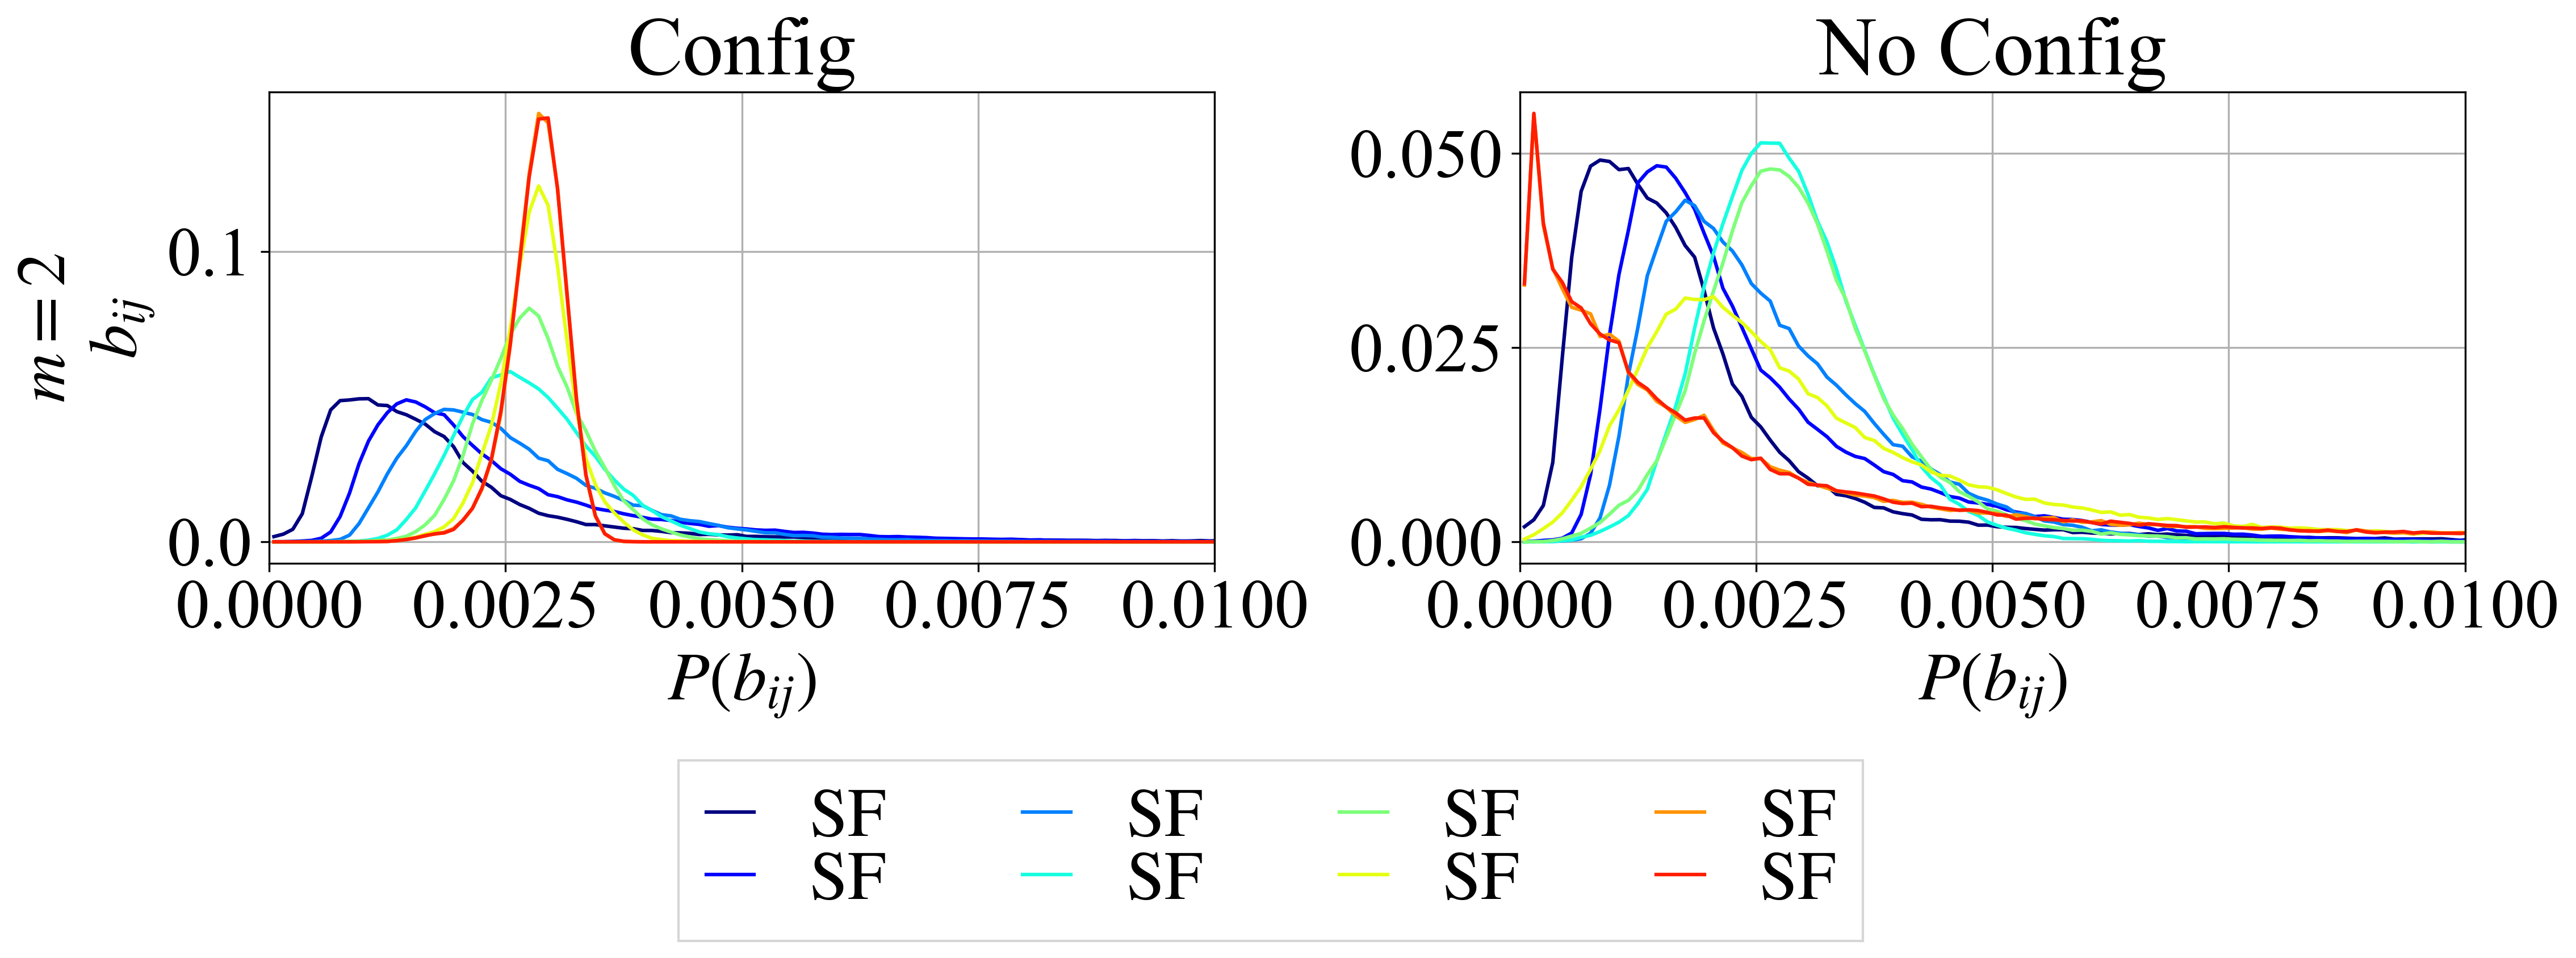

In [1]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from tqdm import tqdm
from colorsys import hsv_to_rgb

from lib.utilities import frequency_distribution

n = 1000
nn = 100
m = 2
bs = [1, 0, -1, -5, -10, -20, -50, -100]
config = True

config_str = "" if config else "_no_config"

c1_h = 358 / 360
c2_h = 224 / 360
g = (c1_h - c2_h) / len(bs)

colors = [hsv_to_rgb(c1_h - i * g, 0.9, 1.0) for i in range(len(bs))]
lss = ["-", "--", "-."]

# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

plt.rcParams["font.size"] = 29
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.handlelength"] = 0.7
plt.rcParams["legend.labelspacing"] = 0
plt.rcParams["legend.handletextpad"] = 0.8  # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1  # 点がある場合のmarker scale
plt.rcParams["legend.fontsize"] = 29
# plt.rcParams["ps.useafm"] = True
# plt.rcParams["pdf.use14corefonts"] = True
# plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 300

ys = 1
xs = 2
fig, ax = plt.subplots(ys, xs, tight_layout=True, figsize=(8*xs, 5*ys))

fig.subplots_adjust(bottom=0.2, left=0.18, top=0.99, right=0.96)

# ax[0][0].set_title("Config")
# ax[0][1].set_title("No Config")

# ax[0][0].set_ylabel("$m = 2$""\n""$b_{ij}$")
# ax[1][0].set_ylabel("$m = 4$""\n""$b_{ij}$")

# ax[1][0].set_xlabel("$P(b_{ij})$")
# ax[1][1].set_xlabel("$P(b_{ij})$")

ax[0].set_title("Config")
ax[1].set_title("No Config")

ax[0].set_ylabel("$m = 2$""\n""$b_{ij}$")

ax[0].set_xlabel("$P(b_{ij})$")
ax[1].set_xlabel("$P(b_{ij})$")

for clr_i, b in enumerate(bs):
    print(f"b={b}")
    ym = dict()
    for i in range(nn):
        path = f"./data/result/bc_n{n}_m2_b{b}_{i}.csv"
        with open(path, "r") as f:
            bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
        # bc = rescale_e(bc, n)
        df = frequency_distribution(bc, 0.0001)
        for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
            if x in ym:
                ym[x] += y / nn
            else:
                ym[x] = y / nn
    l = fr"${b}$"
    if b == "a":
        l = r"$\rm{SF}$"
    ax[0].plot(list(ym.keys()), list(ym.values()), label=l, color=cm.jet(clr_i / len(bs)))
    ax[0].set_xlim([0, 0.010])
    print(f"integ: {sum(list(ym.values()))}")

# m=2, no config
for clr_i, b in enumerate(bs):
    print(f"b={b}")
    ym = dict()
    for i in range(nn):
        path = f"./data/result/bc_n{n}_m2_b{b}_no_config_{i}.csv"
        with open(path, "r") as f:
            bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
        # bc = rescale_e(bc, n)
        df = frequency_distribution(bc, 0.0001)
        for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
            if x in ym:
                ym[x] += y / nn
            else:
                ym[x] = y / nn
    l = fr"${b}$" if b == "a" else r"$\rm{SF}$"
    ax[1].plot(list(ym.keys()), list(ym.values()), label=l, color=cm.jet(clr_i / len(bs)))
    ax[1].set_xlim([0, 0.010])
    print(f"integ: {sum(list(ym.values()))}")

# # m=4, config
# for clr_i, b in enumerate(bs):
#     print(f"b={b}")
#     ym = dict()
#     for i in range(nn):
#         path = f"./data/result/bc_n{n}_m4_b{b}_{i}.csv"
#         with open(path, "r") as f:
#             bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
#         # bc = rescale_e(bc, n)
#         df = frequency_distribution(bc, 0.0001)
#         for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
#             if x in ym:
#                 ym[x] += y / nn
#             else:
#                 ym[x] = y / nn
#     l = fr"${b}$"
#     if b == "a":
#         l = r"$\rm{SF}$"
#     ax[1][0].plot(list(ym.keys()), list(ym.values()), label=l, color=cm.jet(clr_i / len(bs)))
#     ax[1][0].set_xlim([0, 0.0035])
#     print(f"integ: {sum(list(ym.values()))}")

# # m=4, no config
# for clr_i, b in enumerate(bs):
#     print(f"b={b}")
#     ym = dict()
#     for i in range(nn):
#         path = f"./data/result/bc_n{n}_m4_b{b}_no_config_{i}.csv"
#         with open(path, "r") as f:
#             bc = [(float(l.replace("\n", ""))) for l in f.readlines()]
#         # bc = rescale_e(bc, n)
#         df = frequency_distribution(bc, 0.0001)
#         for x, y in zip(list(df["class_value"]), list(df["relative_frequency"])):
#             if x in ym:
#                 ym[x] += y / nn
#             else:
#                 ym[x] = y / nn
#     l = fr"${b}$"
#     if b == 1:
#         l = r"$\rm{SF}$"
#     ax[1][1].plot(list(ym.keys()), list(ym.values()), label=l, color=cm.jet(clr_i / len(bs)))
#     ax[1][1].set_xlim([0, 0.0035])
#     print(f"integ: {sum(list(ym.values()))}")

# plt.xlim([0, 0.010])
# plt.legend(loc="upper right")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor=(0.5, 0.08), ncol=4)
fig.savefig(f'./img/bc.eps', bbox_inches="tight", pad_inches=0.05)
# plt.savefig("./媒介中心性(エッジ)の分布の変化_loglog.png")
plt.show()
